In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from utils import Constellation, tle_from_orbital_parameters, starlink_constellation
from astropy import units as u
from lsst.sims.utils import _angularSeparation


In [2]:
satellites = starlink_constellation()

In [3]:
constellation = Constellation(satellites)

In [7]:
mjd = 59853.9856438209
constellation.update_mjd(mjd)

In [10]:
mjd = 59853.9856438209+.01
constellation.check_pointing(60., 0., mjd)

0.14285714285714285

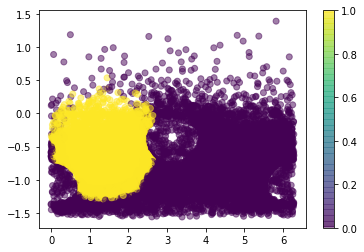

In [6]:
plt.scatter(constellation.azimuth_rad,constellation.altitudes_rad, c=constellation.eclip, alpha=.5)
plt.colorbar()

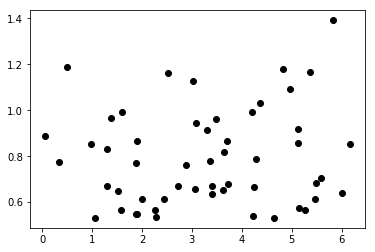

In [7]:
good = constellation.above_alt_limit
plt.plot(constellation.azimuth_rad[good],constellation.altitudes_rad[good], 'ko')

In [8]:
# Let's look at what happens in a 30s advance
constellation.update_mjd(59853.9856438209)
dt = 5./3600./24.
good = constellation.above_alt_limit.copy()
az1 = constellation.azimuth_rad[good] +0
alt1 = constellation.altitudes_rad[good] + 0


constellation.update_mjd(59853.9856438209 + dt)

az2 = constellation.azimuth_rad[good] +0
alt2 = constellation.altitudes_rad[good] + 0



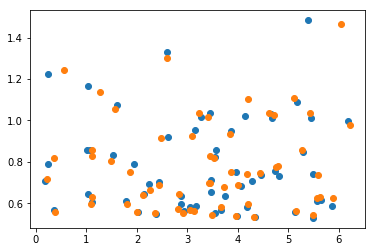

In [9]:
plt.plot(az1, alt1, 'o')
plt.plot(az2, alt2, 'o')

In [10]:
dist =  _angularSeparation(az1, alt1, az2, alt2)

In [11]:
np.degrees(dist)

array([ 2.49519115,  2.83004915,  1.75471003,  2.51084345,  3.74500348,
        2.52422018,  0.80459386,  1.46478863,  1.5379122 ,  0.87233432,
        1.14932791,  1.17453438,  1.23351914,  1.3588811 ,  0.88790466,
        0.7430369 ,  1.41564614,  1.69960138,  0.95060506,  1.15163415,
        1.42241099,  0.98569831,  1.10434807,  0.86275281,  1.50607233,
        1.44882548,  0.80572394,  0.91131671,  1.57972361,  1.46389196,
        0.80571764,  0.86962325,  1.18869782,  1.40818956,  1.27556492,
        0.94724115,  0.92163951,  0.9440282 ,  0.92117485,  0.91700529,
        5.66423923,  4.52546437,  4.89957596,  2.93653974,  4.30719616,
        3.25187558,  2.99121639,  4.3371818 ,  4.45138845,  2.7497643 ,
        2.63890584,  3.66880458,  3.82182312,  4.68231957,  6.06353052,
        4.07241149,  4.02210543,  3.05292222,  5.14246103])

In [12]:
# OK, so some of these things are moving 30 degrees on sky in 30 seconds. So we literally have to do 1-2s timesteps to get them.
